<a href="https://colab.research.google.com/github/zs-eren/KPOP-BTS-Data-Project-DSA210/blob/main/EDA_and_Hypothesisreupload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

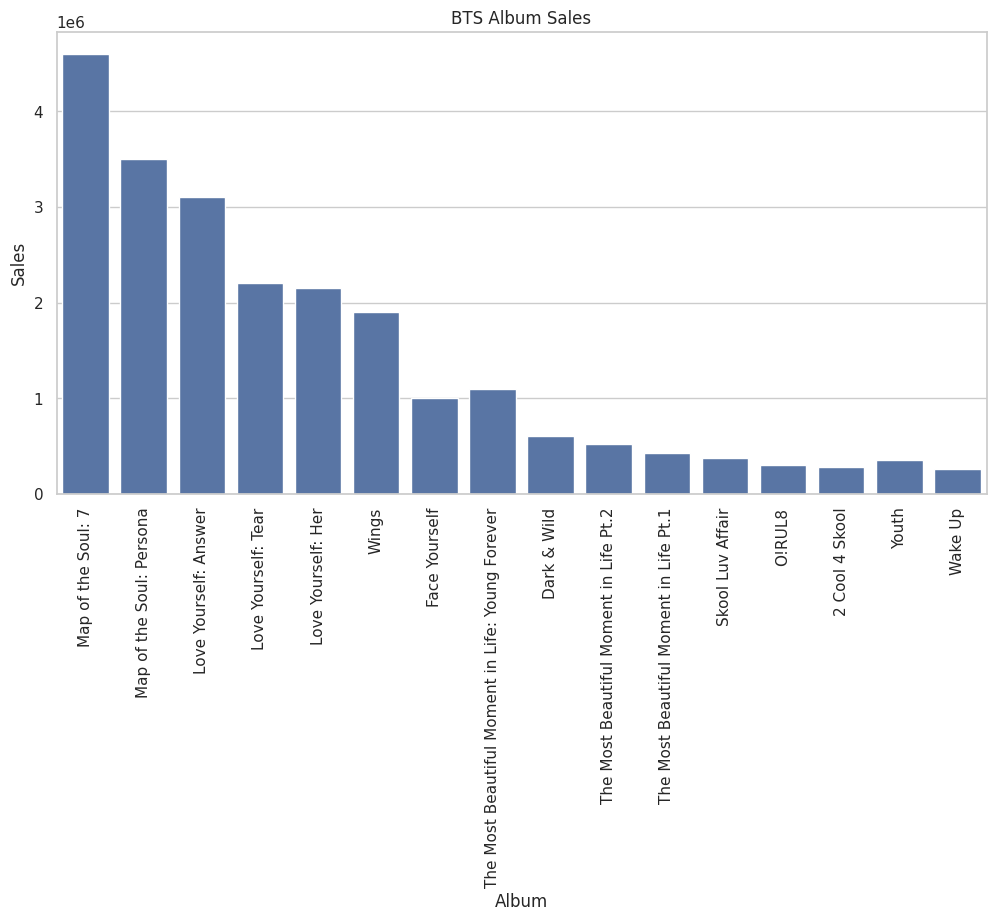

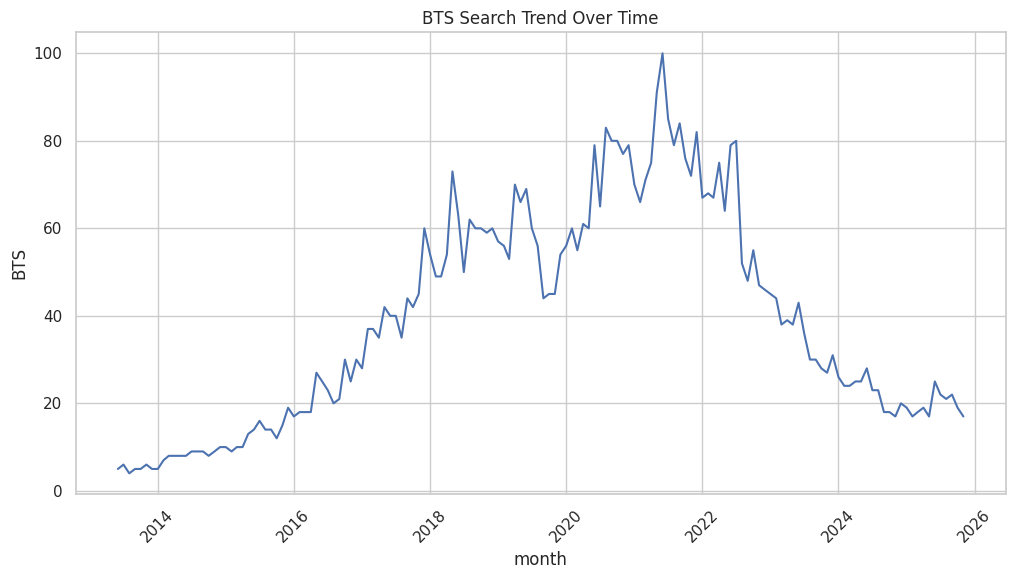

Correlation between Sales and BTS Trend: 0.8608533431478597
p-value: 1.8596165573241552e-05


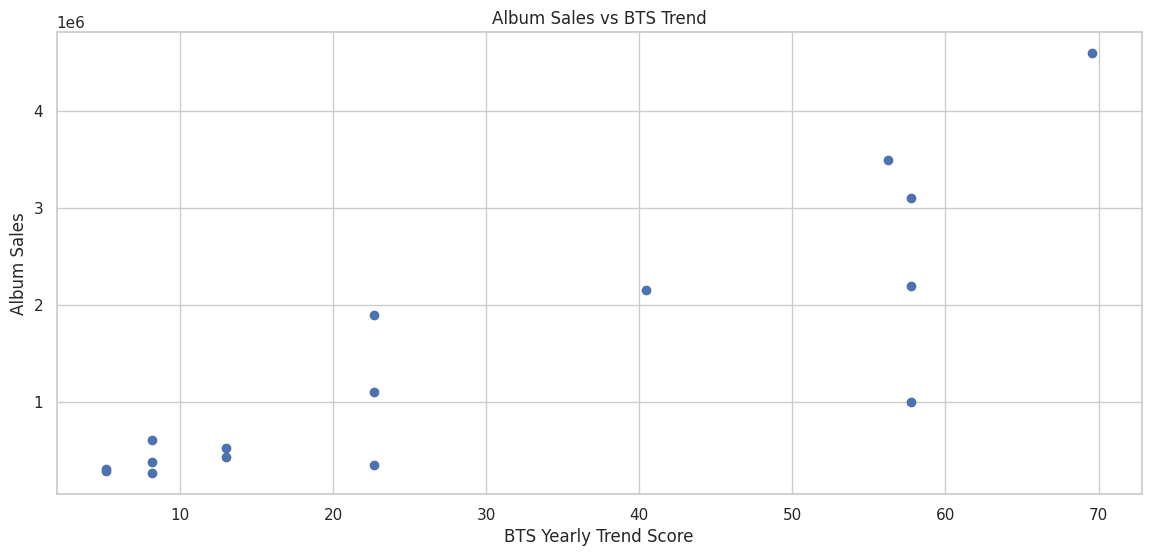

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)


album = pd.read_csv("/content/bts_album_sales.csv")
members = pd.read_csv("/content/bts_member_trends.csv")
bts = pd.read_csv("/content/BTS_trends.csv")


bts = bts.rename(columns={
    "AY": "month",
    "BTS: (Dünya Genelinde)": "BTS"
})

members["month"] = pd.to_datetime(members["month"], format="%Y-%m")
bts["month"] = pd.to_datetime(bts["month"], errors="coerce")


members["Year"] = members["month"].dt.year
bts["Year"] = bts["month"].dt.year

album["Year"] = album["Year"].astype(int)


bts_yearly = bts.groupby("Year")["BTS"].mean().reset_index()

merged = pd.merge(album, bts_yearly, on="Year", how="left")
merged_clean = merged.dropna(subset=["BTS"])


plt.figure(figsize=(12,6))
sns.barplot(data=album, x="Album", y="Sales")
plt.xticks(rotation=90)
plt.title("BTS Album Sales")
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data=bts, x="month", y="BTS")
plt.title("BTS Search Trend Over Time")
plt.xticks(rotation=45)
plt.show()


if len(merged_clean) >= 2:
    corr, p = pearsonr(merged_clean["Sales"], merged_clean["BTS"])
    print("Correlation between Sales and BTS Trend:", corr)
    print("p-value:", p)

    plt.scatter(merged_clean["BTS"], merged_clean["Sales"])
    plt.xlabel("BTS Yearly Trend Score")
    plt.ylabel("Album Sales")
    plt.title("Album Sales vs BTS Trend")
    plt.show()
else:
    print("Not enough data to compute correlation.")
    print("Merged dataset size:", len(merged_clean))


In [26]:
import scipy.stats as stats

early = album[album["Year"] < 2017]["Sales"]
late = album[album["Year"] >= 2017]["Sales"]

t, p = stats.ttest_ind(late, early, equal_var=False)

print("t value is", t)
print("p value is", p)


t value is 4.001849054316033
p value is 0.007018765646852675


In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = bts_yearly["Year"].values.reshape(-1,1)
y = bts_yearly["BTS"].values

model = LinearRegression()
model.fit(x, y)

print("slope:", model.coef_[0])


slope: 2.5194745730460015


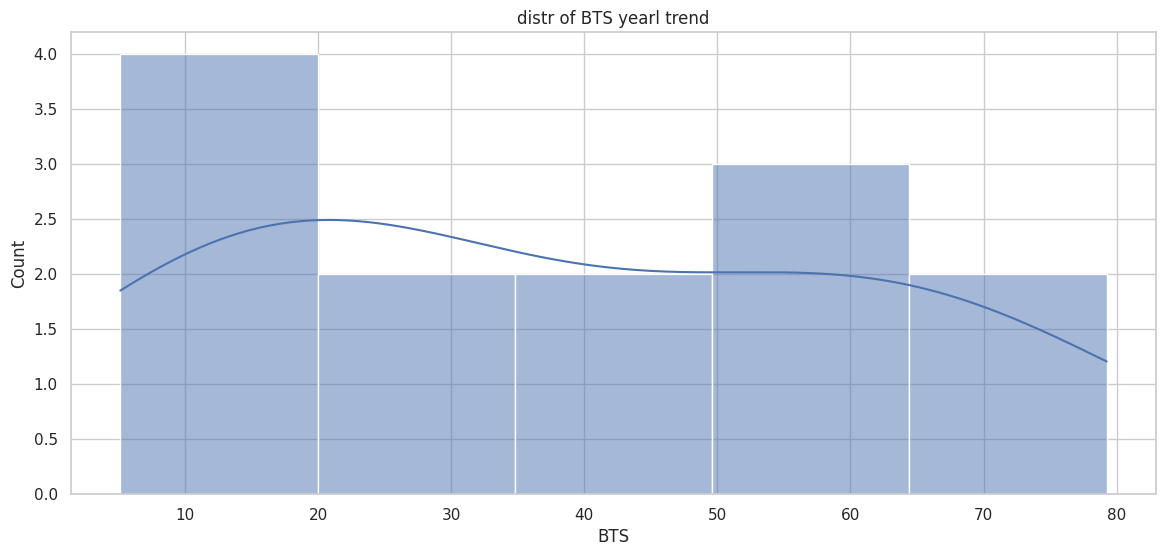

In [24]:
sns.histplot(bts_yearly["BTS"], kde=True)
plt.title("distr of BTS yearl trend")
plt.show()


<Axes: xlabel='Sales', ylabel='Count'>

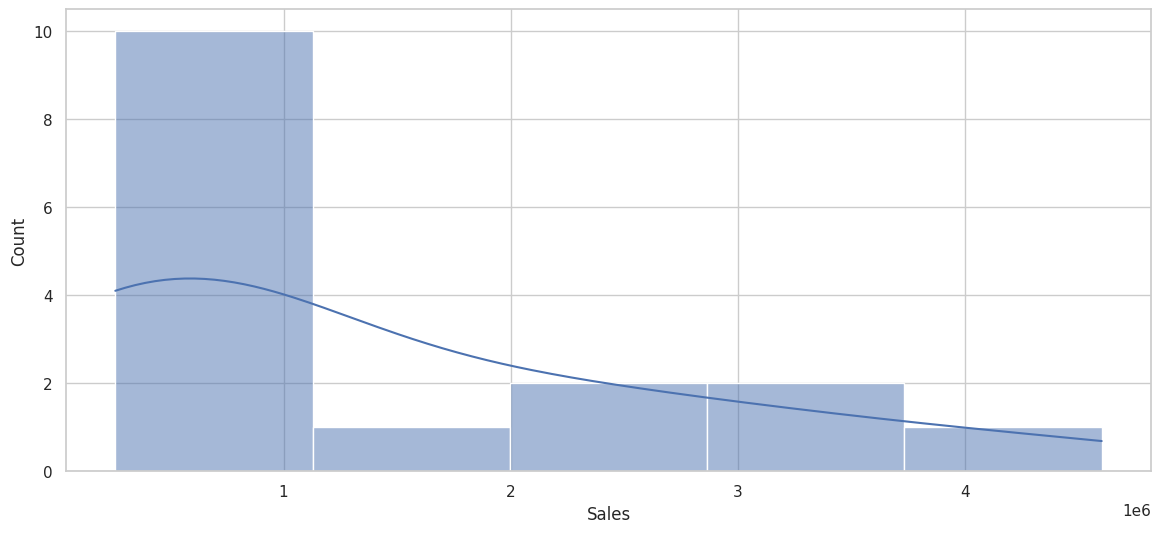

In [22]:
sns.histplot(album["Sales"], kde=True)



In [23]:
from sklearn.linear_model import LinearRegression

X = merged_clean["BTS"].values.reshape(-1,1)
y = merged_clean["Sales"].values

model = LinearRegression()
model.fit(X,y)

print("coef:", model.coef_[0])
print("ıntercept:", model.intercept_)


coef: 50249.043666714926
ıntercept: -53806.831602602964


<Axes: xlabel='BTS', ylabel='Sales'>

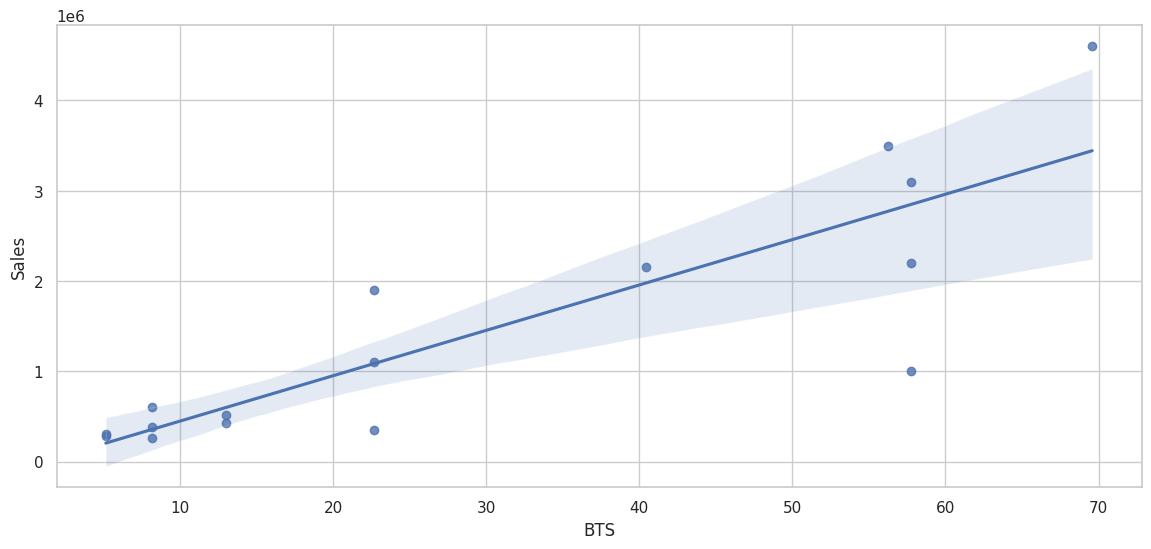

In [20]:
sns.regplot(data=merged_clean, x="BTS", y="Sales")
